<a href="https://colab.research.google.com/github/martin-kosiik/Test/blob/master/keras_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import keras

Interesting code 
### Important section

In [0]:
def function1(x, y):
  return x + y

function1(1, 2)

3

# New Section

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense

model.add(Dense(units=512, activation='relu', input_shape = (28 * 28, )))
model.add(Dense(units=10, activation='softmax'))


In [0]:
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [0]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255


In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [0]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.6053 - acc: 0.8525
Epoch 2/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.3215 - acc: 0.9104
Epoch 3/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.2736 - acc: 0.9233
Epoch 4/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.2429 - acc: 0.9322
Epoch 5/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.2195 - acc: 0.9390


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test) 
test_loss
test_acc

10000/10000 [==============================] - 0s 50us/step


0.9418

In [0]:
test_loss

0.2072914800837636

## IMDB data

In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = old
del(old)


Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
len(train_data)

25000

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from keras import models 
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.5108 - acc: 0.7877 - val_loss: 0.3785 - val_acc: 0.8764
Epoch 2/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.2989 - acc: 0.9077 - val_loss: 0.3132 - val_acc: 0.8772
Epoch 3/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.2200 - acc: 0.9261 - val_loss: 0.2886 - val_acc: 0.8825
Epoch 4/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.1707 - acc: 0.9451 - val_loss: 0.3465 - val_acc: 0.8611
Epoch 5/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1437 - acc: 0.9528 - val_loss: 0.2961 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1164 - acc: 0.9637 - val_loss: 0.3079 - val_acc: 0.8813
Epoch 7/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.0990 - acc: 0.9707 - val_loss: 0.3141 - 

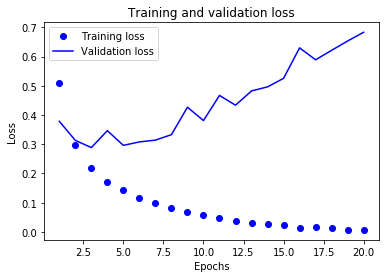

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()
plt.show()


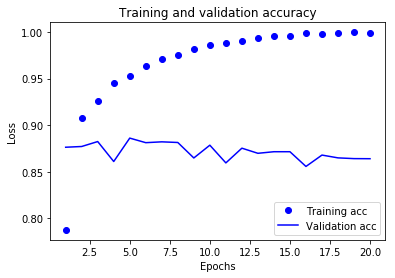

In [0]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()


In [0]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 4s 167us/step - loss: 0.2345 - acc: 0.9459
Epoch 2/4
25000/25000 [==============================] - 4s 169us/step - loss: 0.1417 - acc: 0.9595
Epoch 3/4
25000/25000 [==============================] - 4s 168us/step - loss: 0.1133 - acc: 0.9659
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step


[0.5065204941129684, 0.8576]

In [0]:
model.predict(x_test) 

array([[0.01763484],
       [0.9999964 ],
       [0.70480716],
       ...,
       [0.05098599],
       [0.04476702],
       [0.7054982 ]], dtype=float32)

In [0]:
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

np.load = old
del(old)


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)


In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]


In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 338us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 233us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 231us/step - loss: 1.0952 - acc: 0.7656 - val_loss: 1.1710 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 2s 230us/step - loss: 0.8696 - acc: 0.8165 - val_loss: 1.0803 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 232us/step - loss: 0.7033 - acc: 0.8474 - val_loss: 0.9845 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 231us/step - loss: 0.5665 - acc: 0.8796 - val_loss: 0.9414 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 231us/step - loss: 0.4584 - acc: 0.9048 - val_loss: 0.9078 - val_acc: 0.8010


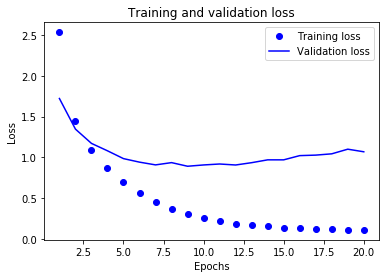

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


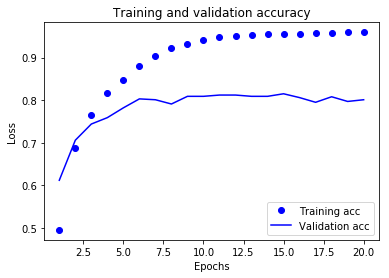

In [0]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val)) 
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 227us/step - loss: 0.1056 - acc: 0.9570 - val_loss: 1.1096 - val_acc: 0.7980
Epoch 2/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.1021 - acc: 0.9575 - val_loss: 1.1138 - val_acc: 0.8030
Epoch 3/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.1029 - acc: 0.9590 - val_loss: 1.1007 - val_acc: 0.7950
Epoch 4/9
7982/7982 [==============================] - 2s 232us/step - loss: 0.1032 - acc: 0.9579 - val_loss: 1.1212 - val_acc: 0.7980
Epoch 5/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.0969 - acc: 0.9589 - val_loss: 1.1486 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.0989 - acc: 0.9564 - val_loss: 1.2240 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.0957 - acc: 0.9570 - val_loss: 1.1761 - val_acc: 0.7980
Epoch 8

In [0]:
results

[1.3465260650468318, 0.780498664345151]

In [0]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


57344/57026 [==============================] - 0s 0us/step


In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean 
test_data /= std

In [0]:
from keras import models
from keras import layers
def build_model(): 
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) 
  model.add(layers.Dense(64, activation='relu')) 
  model.add(layers.Dense(1)) 
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
  return model


In [0]:
k=4 
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


In [0]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) 
  all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
 all_scores

[2.0787384651675085, 2.199129562566776, 2.858053103531941, 2.3767240549078084]

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [0]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                36928     
__________

In [0]:
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)


from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

np.load = old
del(old)

train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1723 - acc: 0.9457
Epoch 2/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0472 - acc: 0.9856
Epoch 3/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0327 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0254 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0200 - acc: 0.9938


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
test_acc


10000/10000 [==============================] - 4s 372us/step


0.9896

In [0]:
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

from keras.datasets import imdb
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

np.load = old
del(old)


In [0]:
from keras.preprocessing import sequence
max_features = 10000 
maxlen = 500
batch_size = 32

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen) 

In [10]:
from keras.layers import Dense
from keras.models import Sequential 
from keras.layers import Embedding, SimpleRNN
model = Sequential() 
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 958us/step - loss: 0.6398 - acc: 0.6154 - val_loss: 0.4606 - val_acc: 0.8042
Epoch 2/10
20000/20000 [==============================] - 18s 919us/step - loss: 0.4067 - acc: 0.8278 - val_loss: 0.4437 - val_acc: 0.8138
Epoch 3/10
20000/20000 [==============================] - 18s 913us/step - loss: 0.2917 - acc: 0.8851 - val_loss: 0.3402 - val_acc: 0.8638
Epoch 4/10
20000/20000 [==============================] - 18s 914us/step - loss: 0.2232 - acc: 0.9140 - val_loss: 0.3587 - val_acc: 0.8484
Epoch 5/10
20000/20000 [==============================] - 18s 918us/step - loss: 0.1646 - acc: 0.9397 - val_loss: 0.4436 - val_acc: 0.8540
Epoch 6/10
20000/20000 [==============================] - 18s 912us/step - loss: 0.1447 - acc: 0.9465 - val_loss: 0.4069 - val_acc: 0.84

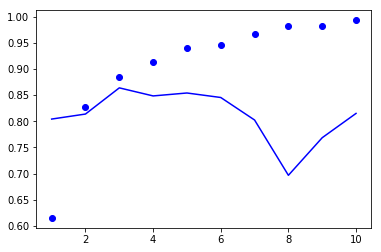

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc')


No handles with labels found to put in legend.


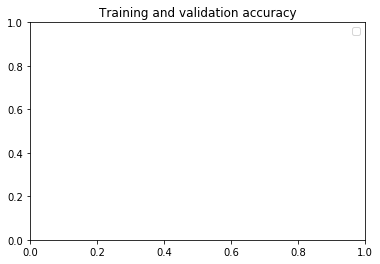

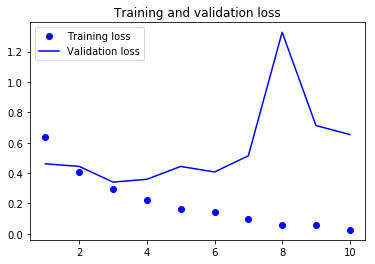

In [13]:
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()